In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
california = fetch_california_housing()
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
# Print the description of the dataset
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
# Create a DataFrame with the data
data = pd.DataFrame(data=california.data, 
                    columns=california.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# Add the target to the DataFrame
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


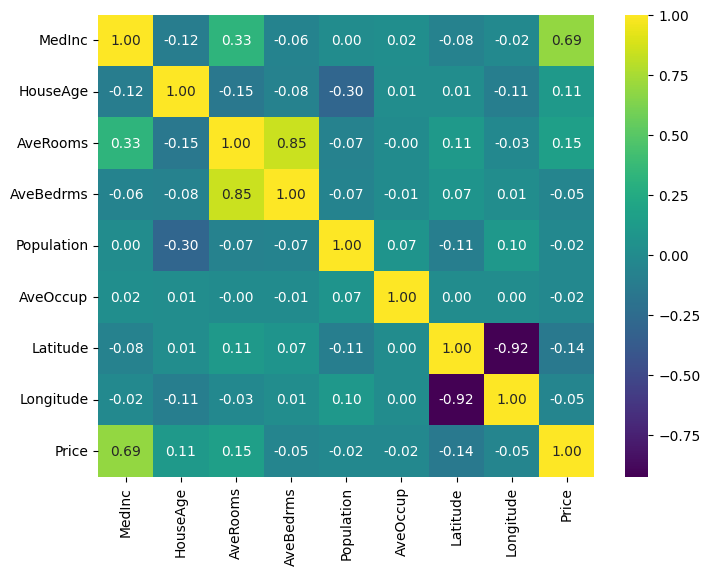

In [16]:
# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='viridis');

In [17]:
# Split the data into dependent and independent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [18]:
X.shape, y.shape

((20640, 8), (20640,))

In [24]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [25]:
# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [26]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Print the coefficients and the intercept
print(model.coef_, model.intercept_)

[ 0.82872299  0.1231163  -0.27068752  0.32859106  0.00213572 -0.02810091
 -0.93017985 -0.89505497] 2.063476808649198


In [30]:
# Make predictions
y_pred = model.predict(X_test)

In [31]:
# Calulate Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, R2 Score and Adjusted R2 Score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')
print(f'Adjusted R2 Score: {adj_r2:.2f}')

Mean Squared Error: 0.55
Mean Absolute Error: 0.54
Root Mean Squared Error: 0.74
R2 Score: 0.59
Adjusted R2 Score: 0.59


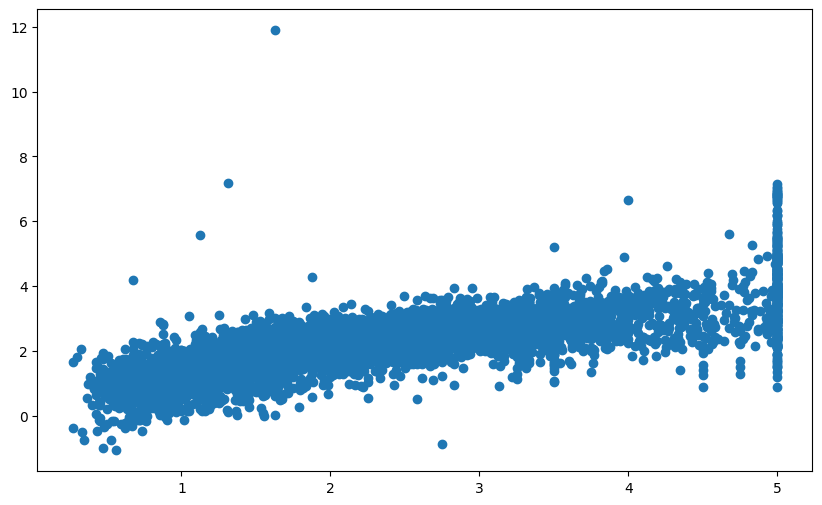

In [34]:
# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred);

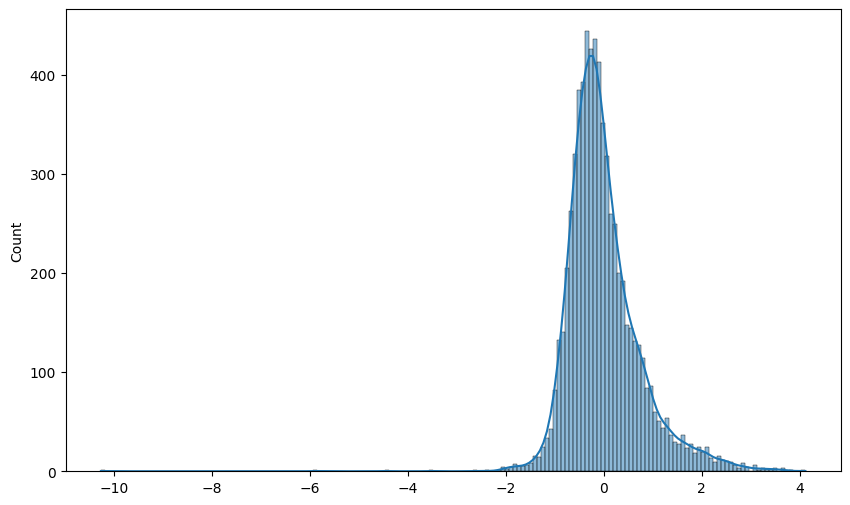

In [35]:
# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True);

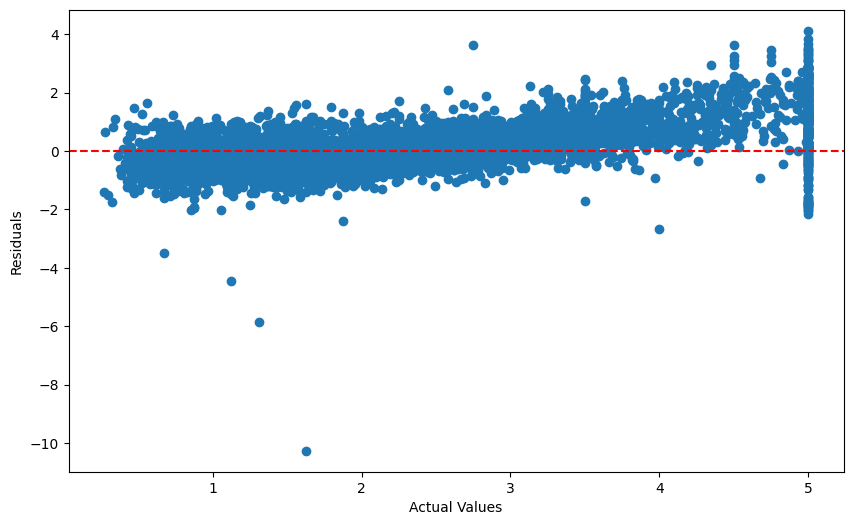

In [37]:
# Plot the residuals against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred)
plt.axhline(0, color='red', ls='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals');

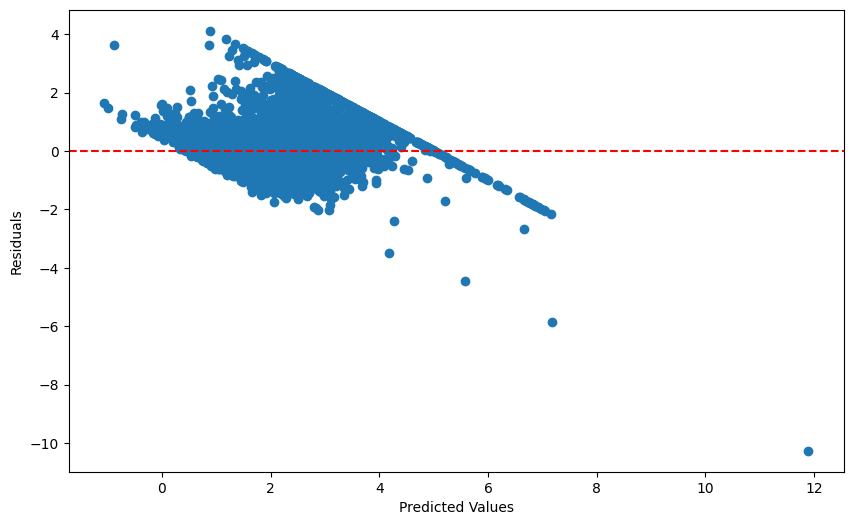

In [38]:
# Not a good fit for the data as the residuals are not randomly distributed
# Plot the residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(0, color='red', ls='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals');

In [39]:
# Save the model with pickle
import pickle

with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [40]:
# Save the scaler with pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)